## Principal Components Analysis

In this notebook, we go over principal components analysis as a dimensionality reduction tool, which is especially useful if our data comes in with many features, and we believe that the data can be sufficiently summarized with a lower-rank data matrix.

The simplest way to derive the PCA is through the __singular value decomposition (SVD)__ and the Eckart-Young Theorem.

Suppose our data is rectangular and quantitative, and let $\mathbb{X}\in\mathbb{R}^{n\times d}$ denote our data matrix, where $n,$ the number of rows, is the number of samples, and $d,$ the number of columns, is the number of features in our data.

To start, let us first import all our necessary libraries and generate a two-dimensional dataset:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

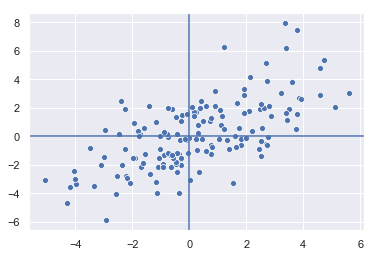

In [59]:
X = np.random.multivariate_normal(mean=[0,0], cov=[[5, 3], [3, 5]], size=150)

# Visualize the dataset
sns.set()
sns.scatterplot(X[:,0], X[:,1]);
plt.axvline(0);
plt.axhline(0);

Now let us take the SVD: $\mathbb{X}=U\Sigma V^T,$ where $\Sigma$ is diagonal, and $U$ and $V$ are orthogonal. Recall the intuition that if $\mathbb{X}$ were a transformation, then its action rotates Euclidean coordinates through $U,$ then $\Sigma$ scales, then $V^T$ rotates back.

Simply put, principal components analysis (PCA) just rotates the coordinate axes so that axis 1 explains the most variance of the data, axis 2 explains the 2nd most variance, and so on. In fact, the total variance of $\mathbb{X}$ can be decomposed:
$$\mathrm{Var}(\mathbb{X})=\frac{1}{n}\sum_{i=1}^d \sigma_i^2,$$
where $\sigma_i$ denotes the $i$-th singular value of $\mathbb{X}.$

The __principal components__ of $\mathbb{X}$ are the axes corresponding to the singular values. For example, the first principal component of $\mathbb{X}$ is the axis corresponding to $\sigma_1.$ Therefore from the decomposition above, we can see exactly how much of the variance each principal component explains.

Concretely, the principal component matrix is defined by $P:=U\Sigma,$ and the $i$-th principal component is just the $i$-th row of $P.$

In [61]:
# The total variance of X is the sum of the column variances
n, d = X.shape
total_var_X_direct = np.sum([np.var(X[:,i]) for i in range(d)])
total_var_X_direct

10.38306436503867

In [70]:
# Using the decomposition using singular values above
u, s, vt = np.linalg.svd(X)
total_var_X_sing_vals = np.sum(s ** 2) / n
total_var_X_sing_vals

10.477791947116105

In [71]:
# We can display how much of the variance is explained by each principal component.
var_explained_by_pc1 = s[0] ** 2 / n
var_explained_by_pc2 = s[1] ** 2 / n
print("Variance explained by 1st PC: ", var_explained_by_pc1)
print("Variance explained by 2nd PC: ", var_explained_by_pc2)

Variance explained by 1st PC:  8.669051496687976
Variance explained by 2nd PC:  1.8087404504281293


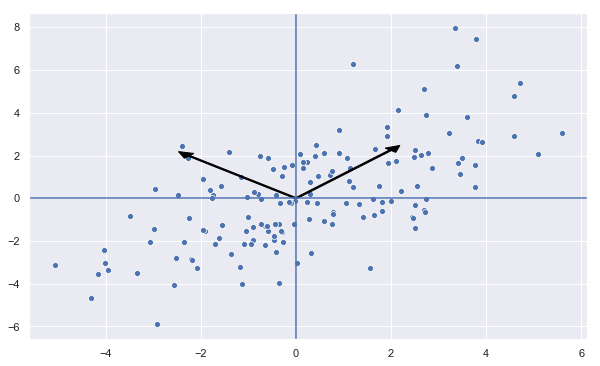

In [121]:
# Get the principal component matrix
sns.set()
plt.figure(figsize=(10, 6))
sns.scatterplot(X[:,0], X[:,1]);
plt.axvline(0);
plt.axhline(0);

plt.arrow(0, 0, 3*vt[0,0], 3*vt[0,1], color='black', width=0.05, head_width=0.3, head_length=0.3);
plt.arrow(0, 0, 3*vt[1,0], 3*vt[1,1], color='black', width=0.05, head_width=0.3, head_length=0.3);

The Eckart-Young Theorem states that the closest lower-rank matrix to $\mathbb{X}$ in the Frobenius-norm is the one obtained by throwing away the smallest singular values from $\Sigma.$ For example, if $\mathbb{X}$ were rank $d,$ then to get the best rank $d-k$ approximation to $\mathbb{X},$ we simply throw away the smallest $k$ singular values of $\mathbb{X}.$

The following data was obtained from the table on the following Wikipedia page: https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state

In [123]:
elections = pd.read_csv("presidential_elections.csv")
elections.head(10)

,State,1789,1792,1796,1800,Unnamed: 5,1804,1808,1812,1816,...,1988,1992,1996,2000 ‡,Unnamed: 60,2004,2008,2012,2016 ‡,State.1
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,NaN,R,R,R,R,Alabama
1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,NaN,R,R,R,R,Alaska
2,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,D,R,NaN,R,R,R,R,Arizona
3,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,D,R,NaN,R,R,R,R,Arkansas
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,D,D,NaN,D,D,D,D,California
5,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,R,R,NaN,R,D,D,D,Colorado
6,Connecticut,GW,GW,F,F,NaN,F,F,F,F,...,R,D,D,D,NaN,D,D,D,D,Connecticut
7,Delaware,GW,GW,F,F,NaN,F,F,F,F,...,R,D,D,D,NaN,D,D,D,D,Delaware
8,D.C.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,D,D,D,NaN,D,D,D,D,D.C.
9,Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,D,R,NaN,R,D,D,R,Florida
